In [1]:
import pandas as pd
import numpy as np
import re
import json
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings

In [2]:

matplotlib.rcParams['font.sans-serif'] = ['cmb10']
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
#路径替换为自己的数据文件所在路径
data = pd.read_csv(r'/Users/mac/Desktop/tmdb_5000_credits.csv', skiprows=0)
data

movie_id                                     title  \
0        19995                                    Avatar   
1          285  Pirates of the Caribbean: At World's End   
2       206647                                   Spectre   
3        49026                     The Dark Knight Rises   
4        49529                               John Carter   
...        ...                                       ...   
4798      9367                               El Mariachi   
4799     72766                                 Newlyweds   
4800    231617                 Signed, Sealed, Delivered   
4801    126186                          Shanghai Calling   
4802     25975                         My Date with Drew   

                                                   cast  \
0     [{"cast_id": 242, "character": "Jake Sully", "...   
1     [{"cast_id": 4, "character": "Captain Jack Spa...   
2     [{"cast_id": 1, "character": "James Bond", "cr...   
3     [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4     [{"cast_id": 5, "character": "John Carter", "c...   
...                                                 ...   
4798  [{"cast_id": 1, "character": "El Mariachi", "c...   
4799  [{"cast_id": 1, "character": "Buzzy", "credit_...   
4800  [{"cast_id": 8, "character": "Oliver O\u2019To...   
4801  [{"cast_id": 3, "character": "Sam", "credit_id...   
4802  [{"cast_id": 3, "character": "Herself", "credi...   

                                                   crew  
0     [{"credit_id": "52fe48009251416c750aca23", "de...  
1     [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2     [{"credit_id": "54805967c3a36829b5002c41", "de...  
3     [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4     [{"credit_id": "52fe479ac3a36847f813eaa3", "de...  
...                                                 ...  
4798  [{"credit_id": "52fe44eec3a36847f80b280b", "de...  
4799  [{"credit_id": "52fe487dc3a368484e0fb013", "de...  
4800  [{"credit_id": "52fe4df3c3a36847f8275ecf", "de...  
4801  [{"credit_id": "52fe4ad9c3a368484e16a36b", "de...  
4802  [{"credit_id": "58ce021b9251415a390165d9", "de...  

[4803 rows x 4 columns]

In [4]:
count = []
for i in list(data['crew']):
    sum = 0
    for j in i:
        if j == '{':
            sum += 1
    count.append(sum)
data2 = pd.DataFrame({'name':data['title'], 'ans':count})
data2


name  ans
0                                       Avatar  153
1     Pirates of the Caribbean: At World's End   32
2                                      Spectre  155
3                        The Dark Knight Rises  217
4                                  John Carter  132
...                                        ...  ...
4798                               El Mariachi   11
4799                                 Newlyweds    8
4800                 Signed, Sealed, Delivered   13
4801                          Shanghai Calling    2
4802                         My Date with Drew    5

[4803 rows x 2 columns]

In [5]:
#路径替换为自己的数据文件所在路径
data3 = pd.read_csv(r"/Users/mac/Desktop/tmdb_5000_movies.csv", skiprows=0)
data3.columns=["预算（美元）", "风格列表", "主页", "id", "关键字", "初始语言", "电影名称", "剧情摘要", "电影页面查看次数", "制作公司", "生产国", "首次上映日期", "收入（美元）", "电影时长", "语言", "社会地位", "收尾语", "标题", "平均评分", "评分次数"]
# data3


In [6]:
data4 = data3.drop('主页', axis='columns')
data4 = data4.drop('初始语言', axis='columns')
data4 = data4.drop('剧情摘要', axis='columns')
data4 = data4.drop('社会地位', axis='columns')
data4 = data4.drop('收尾语', axis='columns')
data4['观看人数']=data2['ans']
#data4


In [7]:
data5=data4.loc[:, ['风格列表', '关键字', '电影名称', '预算（美元）', '收入（美元）', '制作公司', '首次上映日期', '电影时长', '平均评分', '观看人数']]
#data5


In [8]:
#将"收入（美元）"列中的0值全部替换为平均值
avg = 0
sum = 0
count = 0
for i in range(4803):
    if data5['收入（美元）'][i] != 0:
        sum += data5['收入（美元）'][i]
        count += 1
avg = sum//count
data5['收入（美元）'] = data5['收入（美元）'].replace({0:avg})


In [9]:
#将"预算（美元）"列中的0值全部替换为平均值
avg = 0
sum = 0
count = 0
for i in range(4803):
    if data5['预算（美元）'][i] != 0:
        sum += data5['预算（美元）'][i]
        count += 1
avg = sum//count
data5['预算（美元）'] = data5['预算（美元）'].replace({0:avg})


In [10]:
data5['利润'] = data5['收入（美元）']-data5['预算（美元）']
data5


风格列表  \
0     [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...                                                 ...   
4798  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801                                                 []   
4802                [{"id": 99, "name": "Documentary"}]   

                                                    关键字  \
0     [{"id": 1463, "name": "culture clash"}, {"id":...   
1     [{"id": 270, "name": "ocean"}, {"id": 726, "na...   
2     [{"id": 470, "name": "spy"}, {"id": 818, "name...   
3     [{"id": 849, "name": "dc comics"}, {"id": 853,...   
4     [{"id": 818, "name": "based on novel"}, {"id":...   
...                                                 ...   
4798  [{"id": 5616, "name": "united states\u2013mexi...   
4799                                                 []   
4800  [{"id": 248, "name": "date"}, {"id": 699, "nam...   
4801                                                 []   
4802  [{"id": 1523, "name": "obsession"}, {"id": 224...   

                                          电影名称     预算（美元）      收入（美元）  \
0                                       Avatar  237000000  2787965087   
1     Pirates of the Caribbean: At World's End  300000000   961000000   
2                                      Spectre  245000000   880674609   
3                        The Dark Knight Rises  250000000  1084939099   
4                                  John Carter  260000000   284139100   
...                                        ...        ...         ...   
4798                               El Mariachi     220000     2040920   
4799                                 Newlyweds       9000   117031352   
4800                 Signed, Sealed, Delivered   37042837   117031352   
4801                          Shanghai Calling   37042837   117031352   
4802                         My Date with Drew   37042837   117031352   

                                                   制作公司      首次上映日期   电影时长  \
0     [{"name": "Ingenious Film Partners", "id": 289...  2009-12-10  162.0   
1     [{"name": "Walt Disney Pictures", "id": 2}, {"...  2007-05-19  169.0   
2     [{"name": "Columbia Pictures", "id": 5}, {"nam...  2015-10-26  148.0   
3     [{"name": "Legendary Pictures", "id": 923}, {"...  2012-07-16  165.0   
4           [{"name": "Walt Disney Pictures", "id": 2}]  2012-03-07  132.0   
...                                                 ...         ...    ...   
4798           [{"name": "Columbia Pictures", "id": 5}]  1992-09-04   81.0   
4799                                                 []  2011-12-26   85.0   
4800  [{"name": "Front Street Pictures", "id": 3958}...  2013-10-13  120.0   
4801                                                 []  2012-05-03   98.0   
4802  [{"name": "rusty bear entertainment", "id": 87...  2005-08-05   90.0   

      平均评分  观看人数          利润  
0      7.2   153  2550965087  
1      6.9    32   661000000  
2      6.3   155   635674609  
3      7.6   217   834939099  
4      6.1   132    24139100  
...    ...   ...         ...  
4798   6.6    11     1820920  
4799   5.9     8   117022352  
4800   7.0    13    79988515  
4801   5.7     2    79988515  
4802   6.3     5    79988515  

[4803 rows x 11 columns]

In [11]:
# for i in range(4803):
#     if pd.isnull(data5['首次上映日期'][i]):
#         print(i, data5['电影名称'][i])
#         data5['首次上映日期'][i]='2014-06-01'
data5['首次上映日期'] = data5['首次上映日期'].fillna('2014-06-01')


In [12]:
# for i in range(4803):
#     if pd.isnull(data5['电影时长'][i]):
#         print(i, data5['电影名称'][i])
value1 = {'电影时长':98.0}
value2 = {'电影时长':81.0}
data5.fillna(value=value1, limit=1, inplace=True)
data5.fillna(value=value2, limit=1, inplace=True)


In [13]:
all_movie_type = []
all_movie = set()  #记录所有电影类型
for i in list(data5['风格列表']):
    con = re.findall(re.compile(r'[[](.*?)[]]', re.S), i)[0]
    list1 = con.split(", ")
    str1 = ""
    dict_list = []
    for j in range(len(list1)):
        if j%2 == 0:
            str1 += str(list1[j]) + ", "
        else:
            str1 += str(list1[j]) 
            dict_list.append(json.loads(str1))
            str1=""
    #提取电影类型
    movie_type=[]
    for j in dict_list:
        all_movie.add(j['name'])
        movie_type.append(j['name'])
    all_movie_type.append(movie_type)
data5['电影类型'] = pd.Series(all_movie_type)
# all_movie


/var/folders/lw/5rk3rwks7vz3j3x2tpft2xqr0000gn/T/ipykernel_7961/3655851140.py:4: FutureWarning: Possible nested set at position 1
  con = re.findall(re.compile(r'[[](.*?)[]]', re.S), i)[0]


In [14]:
#首次上映日期处理

#时间格式转换
# data5['首次上映日期'] = pd.to_datetime(data5['首次上映日期'], format='%Y-%m-%d')
show_year = []
for i in list(data5['首次上映日期']):
    year = int(i[0:4])
    show_year.append(year)
data5['发行年份'] = pd.Series(show_year)
data5 = data5.drop('首次上映日期', axis='columns')
data5


风格列表  \
0     [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...                                                 ...   
4798  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801                                                 []   
4802                [{"id": 99, "name": "Documentary"}]   

                                                    关键字  \
0     [{"id": 1463, "name": "culture clash"}, {"id":...   
1     [{"id": 270, "name": "ocean"}, {"id": 726, "na...   
2     [{"id": 470, "name": "spy"}, {"id": 818, "name...   
3     [{"id": 849, "name": "dc comics"}, {"id": 853,...   
4     [{"id": 818, "name": "based on novel"}, {"id":...   
...                                                 ...   
4798  [{"id": 5616, "name": "united states\u2013mexi...   
4799                                                 []   
4800  [{"id": 248, "name": "date"}, {"id": 699, "nam...   
4801                                                 []   
4802  [{"id": 1523, "name": "obsession"}, {"id": 224...   

                                          电影名称     预算（美元）      收入（美元）  \
0                                       Avatar  237000000  2787965087   
1     Pirates of the Caribbean: At World's End  300000000   961000000   
2                                      Spectre  245000000   880674609   
3                        The Dark Knight Rises  250000000  1084939099   
4                                  John Carter  260000000   284139100   
...                                        ...        ...         ...   
4798                               El Mariachi     220000     2040920   
4799                                 Newlyweds       9000   117031352   
4800                 Signed, Sealed, Delivered   37042837   117031352   
4801                          Shanghai Calling   37042837   117031352   
4802                         My Date with Drew   37042837   117031352   

                                                   制作公司   电影时长  平均评分  观看人数  \
0     [{"name": "Ingenious Film Partners", "id": 289...  162.0   7.2   153   
1     [{"name": "Walt Disney Pictures", "id": 2}, {"...  169.0   6.9    32   
2     [{"name": "Columbia Pictures", "id": 5}, {"nam...  148.0   6.3   155   
3     [{"name": "Legendary Pictures", "id": 923}, {"...  165.0   7.6   217   
4           [{"name": "Walt Disney Pictures", "id": 2}]  132.0   6.1   132   
...                                                 ...    ...   ...   ...   
4798           [{"name": "Columbia Pictures", "id": 5}]   81.0   6.6    11   
4799                                                 []   85.0   5.9     8   
4800  [{"name": "Front Street Pictures", "id": 3958}...  120.0   7.0    13   
4801                                                 []   98.0   5.7     2   
4802  [{"name": "rusty bear entertainment", "id": 87...   90.0   6.3     5   

              利润                                           电影类型  发行年份  
0     2550965087  [Action, Adventure, Fantasy, Science Fiction]  2009  
1      661000000                   [Adventure, Fantasy, Action]  2007  
2      635674609                     [Action, Adventure, Crime]  2015  
3      834939099               [Action, Crime, Drama, Thriller]  2012  
4       24139100           [Action, Adventure, Science Fiction]  2012  
...          ...                                            ...   ...  
4798     1820920                      [Action, Crime, Thriller]  1992  
4799   117022352                              [Comedy, Romance]  2011  
4800    79988515             [Comedy, Drama, Romance, TV Movie]  2013  
4801    79988515                                             []  2012  
4802    79988515           

In [15]:
count_type = dict.fromkeys(all_movie,0)
for i in data5['电影类型']:
    for j in i:
        count_type[j] += 1
count_type


{'Horror': 519,
 'Thriller': 1274,
 'Action': 1154,
 'Documentary': 110,
 'Family': 513,
 'Comedy': 1722,
 'War': 144,
 'Science Fiction': 535,
 'TV Movie': 8,
 'Music': 185,
 'Foreign': 34,
 'Animation': 234,
 'Western': 82,
 'Adventure': 790,
 'History': 197,
 'Fantasy': 424,
 'Mystery': 348,
 'Drama': 2297,
 'Crime': 696,
 'Romance': 894}

In [16]:
dt = {'电影类型':count_type.keys(),'电影数量（部）':count_type.values()}
data6 = pd.DataFrame(dt)
data6["电影类型"]


0              Horror
1            Thriller
2              Action
3         Documentary
4              Family
5              Comedy
6                 War
7     Science Fiction
8            TV Movie
9               Music
10            Foreign
11          Animation
12            Western
13          Adventure
14            History
15            Fantasy
16            Mystery
17              Drama
18              Crime
19            Romance
Name: 电影类型, dtype: object

In [17]:
plt.figure(figsize=(9,6))
#排序
a6=data6.sort_values(by='电影数量（部）',ascending=True)
plt.barh(range(20), a6['电影数量（部）'], height=0.5, color='pink', alpha=1)
plt.yticks(range(20), count_type.keys())
plt.xlim(0, 2400)
plt.xlabel("numbers")
plt.ylabel("categories")
plt.title("cate_nums")
for x,y in enumerate(a6['电影数量（部）']):
    plt.text(y+0.2, x-0.1, '%s'%y+"")
# plt.savefig('./img/各种电影类型数量统计图.png', dpi=600, format='png', bbox_inches='tight')
plt.show()


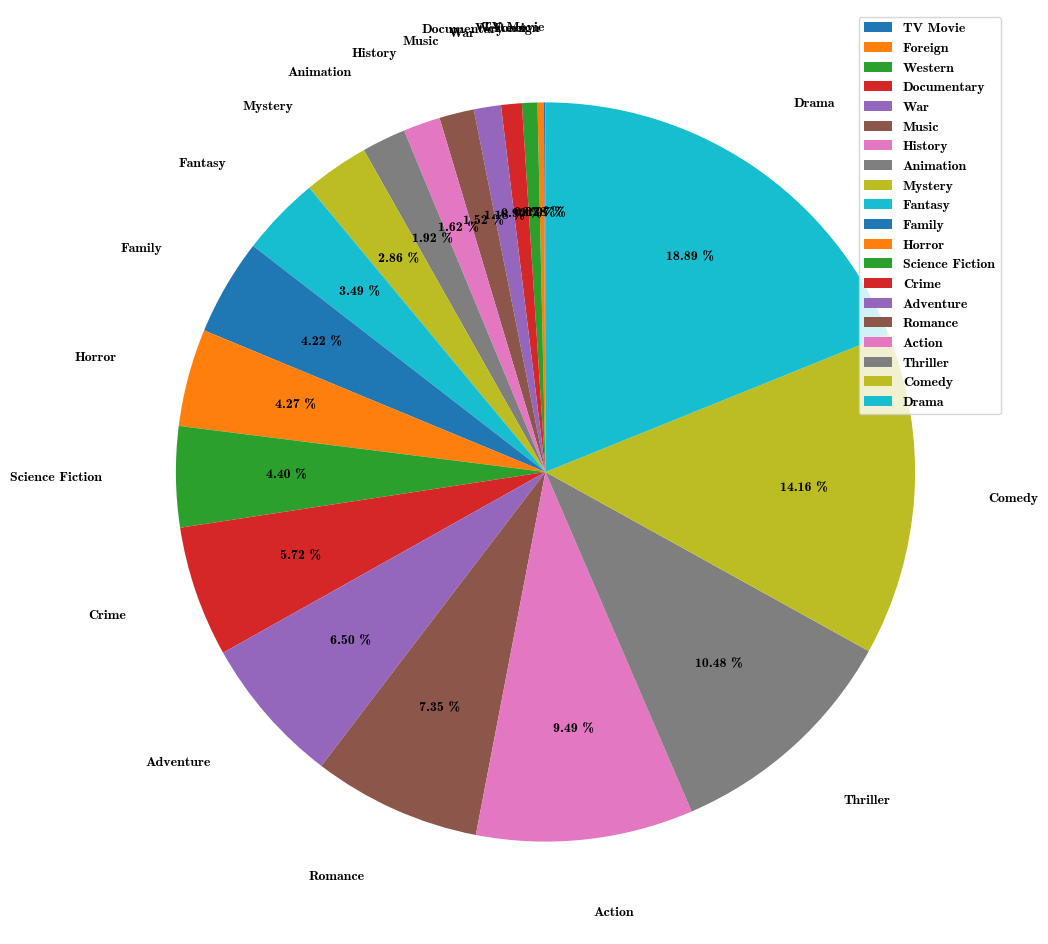

In [18]:
plt.rcParams['figure.figsize']=(17, 12)
movie_count = a6['电影数量（部）'].values
movie_sum = a6['电影数量（部）'].sum()
#计算各个电影类型所占百分比
percentage = (movie_count/movie_sum)*100
#保留两位小数
np.set_printoptions(precision=2)
labels = a6['电影类型'].values
plt.axes(aspect=1)
plt.pie(x = percentage, labels=labels, autopct='%.2f %%', shadow=False,
        labeldistance=1.2, startangle = 90, pctdistance = 0.7)
plt.legend(loc='upper right')
# plt.savefig('./img/各种电影类型占比图.png', dpi=600, format='png', bbox_inches='tight')
plt.show()



In [19]:
data7 = pd.DataFrame()


In [20]:
for genre in all_movie:
    data7[genre] = data5['风格列表'].str.contains(genre).apply(lambda x:1 if x else 0)
data7.index = data5['发行年份']
movie_year = data7.groupby('发行年份').sum()
movie_year.head()
movie_year.tail()


Horror  Thriller  Action  Documentary  Family  Comedy  War  \
发行年份                                                               
2013      25        53      56           10      22      71    3   
2014      21        66      54            7      23      62   10   
2015      33        67      46            7      17      52    2   
2016      20        27      39            0       9      26    3   
2017       0         0       0            0       1       1    0   

      Science Fiction  TV Movie  Music  Foreign  Animation  Western  \
发行年份                                                                  
2013               27         2     12        0         17        1   
2014               26         0      9        0         14        3   
2015               28         0      8        0         13        7   
2016               11         0      1        0          4        1   
2017                0         0      0        0          0        0   

      Adventure  History  Fantasy  Mystery  Drama  Crime  Romance  
发行年份                                                               
2013         36        8       21        5    110     37       25  
2014         37        7       16       15    110     27       24  
2015         35        9       10       20     95     26       23  
2016         23        6       13        6     37     10        9  
2017          0        0        0        0      1      0        0

In [21]:
plt.figure(figsize=(12,8))
plt.plot(movie_year, label=movie_year.columns)
plt.xticks(range(1910,2018,5))
plt.legend(movie_year)
plt.title('Trend',fontsize=15)
plt.xlabel('years',fontsize=15)
plt.ylabel('numbers',fontsize=15)
plt.grid(True)  #显示网格线
# plt.savefig('./img/电影类型随时间变化的趋势图.png', dpi=600, format='png', bbox_inches='tight')
plt.show()


In [22]:
genre_profit = dict.fromkeys(all_movie,0)
for i in range(4803):
    for j in data5['电影类型'][i]:
        genre_profit[j] += data5['利润'][i]
for i in data6['电影类型']:
    genre_profit[i] /= count_type[i]
# genre_profit


In [23]:
dt = {'电影类型':genre_profit.keys(),'收入':genre_profit.values()}
genre_profit_data = pd.DataFrame(dt)
genre_profit_data


电影类型            收入
0            Horror  6.043865e+07
1          Thriller  7.216813e+07
2            Action  1.069430e+08
3       Documentary  5.602798e+07
4            Family  1.340737e+08
5            Comedy  7.437827e+07
6               War  6.366630e+07
7   Science Fiction  1.174366e+08
8          TV Movie  9.272958e+07
9             Music  6.342341e+07
10          Foreign  6.775845e+07
11        Animation  1.766170e+08
12          Western  4.191084e+07
13        Adventure  1.560404e+08
14          History  4.971221e+07
15          Fantasy  1.460115e+08
16          Mystery  6.903151e+07
17            Drama  6.157373e+07
18            Crime  5.966100e+07
19          Romance  6.878714e+07

In [24]:
plt.rcParams['figure.figsize']=(9, 6)
# 对于‘利润’列数据按值大小进行降序排序
a=genre_profit_data.sort_values(by='收入',ascending=True)
plt.barh(range(20), a['收入'], height=0.5, color='green', alpha=0.5)
plt.yticks(range(20), genre_profit_data['电影类型'])
plt.title('Incomes')
plt.xlabel('incomes')
plt.ylabel('categories')
for x,y in enumerate(a['收入']):
    plt.text(y+0.2, x-0.1, '%s'%y+"")
# plt.savefig('./img/各种电影类型的平均利润图.png', dpi=600, format='png', bbox_inches='tight')
plt.show()


In [25]:
data5['制作公司'] = data5['制作公司'].apply(json.loads) #格式转换
def decode(column):
    z = []
    for i in column:
        z.append(i['name'])
    return ' '.join(z)

data5['制作公司'] = data5['制作公司'].apply(decode)
data5['制作公司'].head(3)


0    Ingenious Film Partners Twentieth Century Fox ...
1    Walt Disney Pictures Jerry Bruckheimer Films S...
2                         Columbia Pictures Danjaq B24
Name: 制作公司, dtype: object

In [26]:
company_st = pd.DataFrame()
company_st['Universal Pictures'] = data5['制作公司'].str.contains('Universal Pictures').apply(lambda x:1 if x else 0)
company_st['Paramount Pictures'] = data5['制作公司'].str.contains('Paramount Pictures').apply(lambda x:1 if x else 0)
company_st


Universal Pictures  Paramount Pictures
0                      0                   0
1                      0                   0
2                      0                   0
3                      0                   0
4                      0                   0
...                  ...                 ...
4798                   0                   0
4799                   0                   0
4800                   0                   0
4801                   0                   0
4802                   0                   0

[4803 rows x 2 columns]

In [27]:
dict_company = {'Universal Pictures':company_st['Universal Pictures'].sum(), 'Paramount Pictures':company_st['Paramount Pictures'].sum()}
company_vs = pd.Series(dict_company)
company_vs


Universal Pictures    314
Paramount Pictures    285
dtype: int64

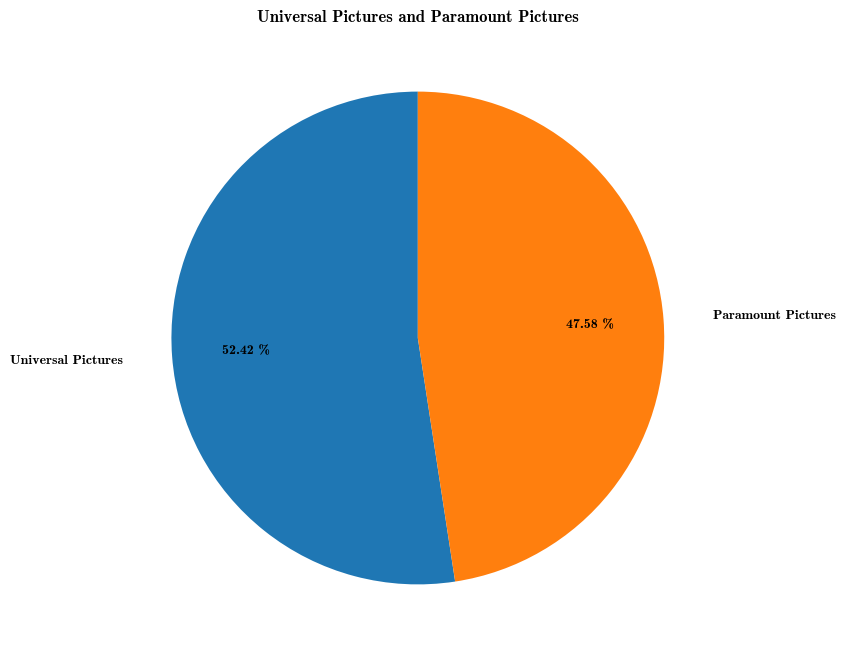

In [28]:
plt.rcParams['figure.figsize']=(12, 8)
#计算各个电影类型所占百分比
percentage = (company_vs.values/company_vs.sum())*100
#保留两位小数
np.set_printoptions(precision=2)
plt.axes(aspect=1)
plt.pie(x = company_vs, labels=company_vs.index, autopct='%.2f %%', shadow=False,
        labeldistance=1.2, startangle = 90, pctdistance = 0.7)
plt.title('Universal Pictures and Paramount Pictures')
# plt.savefig('./img/Universal Pictures和Paramount Pictures两家公司电影发行数量对比图.png', dpi=600, format='png', bbox_inches='tight')
plt.show()


In [29]:
company_data = company_st[['Universal Pictures','Paramount Pictures']]
company_data.index = data5['发行年份']
company_data = company_data.groupby('发行年份').sum()
company_data


Universal Pictures  Paramount Pictures
发行年份                                        
1916                   0                   0
1925                   0                   0
1927                   0                   1
1929                   0                   0
1930                   0                   0
...                  ...                 ...
2013                   9                   8
2014                  10                   8
2015                  13                   7
2016                  10                   5
2017                   0                   0

[90 rows x 2 columns]

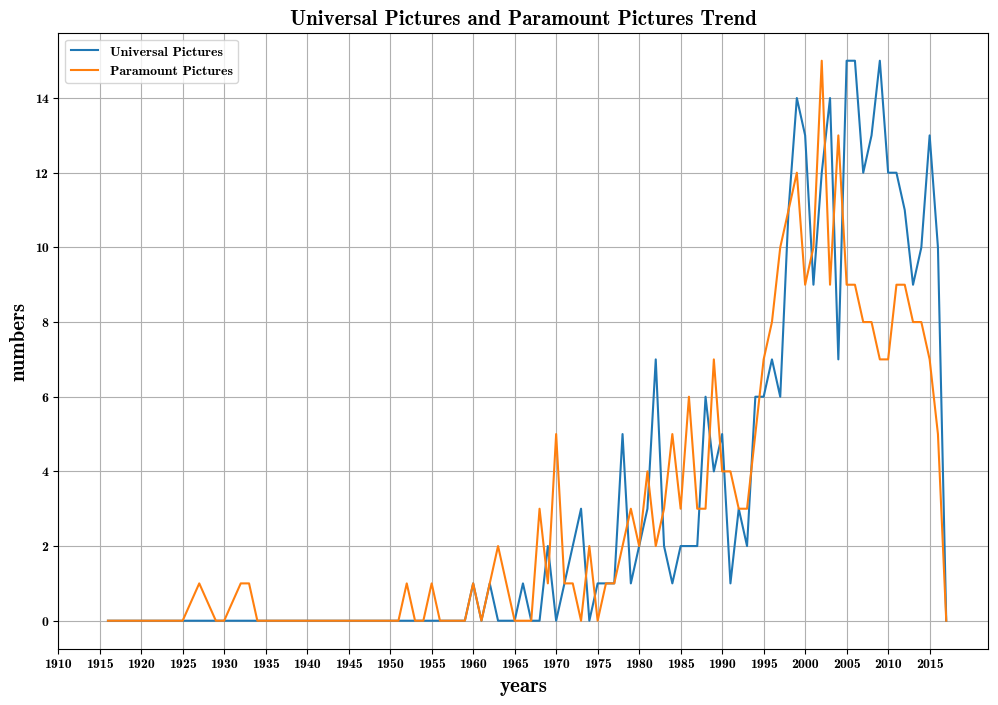

In [30]:
plt.figure(figsize=(12,8))
plt.plot(company_data, label=company_data.columns)
plt.xticks(range(1910,2018,5))
plt.legend(company_data)
plt.title('Universal Pictures and Paramount Pictures Trend',fontsize=15)
plt.xlabel('years',fontsize=15)
plt.ylabel('numbers',fontsize=15)
plt.grid(True)  #显示网格线
# plt.savefig('./img/Universal Pictures和Paramount Pictures公司电影的发行量时间走势图.png', dpi=600, format='png', bbox_inches='tight')
plt.show()


In [31]:
data5['关键字'] = data5['关键字'].apply(json.loads) #格式转换
def decode(column):
    z = []
    for i in column:
        z.append(i['name'])
    return ' '.join(z)

data5['关键字'] = data5['关键字'].apply(decode)
data5['关键字'].head(3)


0    culture clash future space war space colony so...
1    ocean drug abuse exotic island east india trad...
2    spy based on novel secret agent sequel mi6 bri...
Name: 关键字, dtype: object

In [32]:
data5['原创与改编'] = data5['关键字'].str.contains('based on novel').apply(lambda x: 'no original' if x else 'original')
data5['原创与改编'].value_counts()


原创与改编
original       4606
no original     197
Name: count, dtype: int64

In [33]:
original_profit = data5[['原创与改编','预算（美元）','收入（美元）','利润']]
original_profit = original_profit.groupby(by='原创与改编').mean()
original_profit


预算（美元）        收入（美元）            利润
原创与改编                                                
no original  4.795794e+07  1.545032e+08  1.065453e+08
original     3.657600e+07  1.154287e+08  7.885267e+07

<Figure size 1200x800 with 0 Axes>

/Users/mac/anaconda3/envs/pytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mac/anaconda3/envs/pytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39069 (\N{CJK UNIFIED IDEOGRAPH-989D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mac/anaconda3/envs/pytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mac/anaconda3/envs/pytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32654 (\N{CJK UNIFIED IDEOGRAPH-7F8E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mac/anaconda3/envs/pytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 208

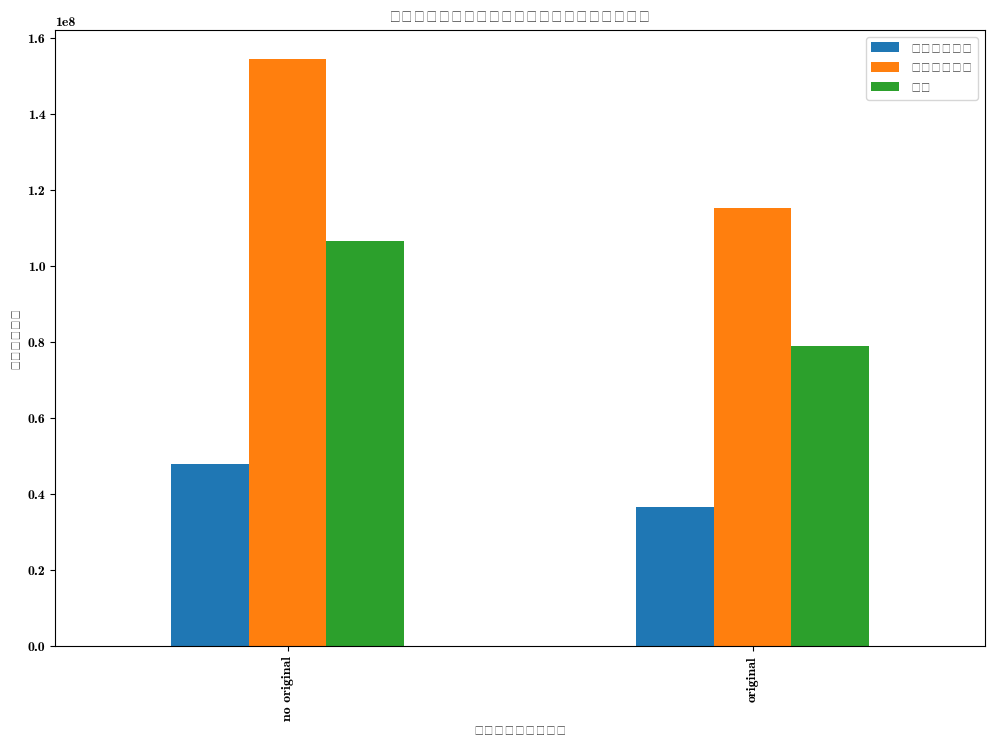

In [34]:
plt.figure(figsize=(12,8))
original_profit.plot(kind='bar')
plt.title('改编电影与原创电影在预算、收入和利润的比较')
plt.xlabel('改编电影与原创电影')
plt.ylabel('金额（美元）')
# plt.savefig('./img/改编电影与原创电影在预算、收入和利润的比较图.png', dpi=600, format='png', bbox_inches='tight')
plt.show()


/Users/mac/anaconda3/envs/pytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30005 (\N{CJK UNIFIED IDEOGRAPH-7535}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mac/anaconda3/envs/pytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24433 (\N{CJK UNIFIED IDEOGRAPH-5F71}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mac/anaconda3/envs/pytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31080 (\N{CJK UNIFIED IDEOGRAPH-7968}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mac/anaconda3/envs/pytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25151 (\N{CJK UNIFIED IDEOGRAPH-623F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mac/anaconda3/envs/pytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 259

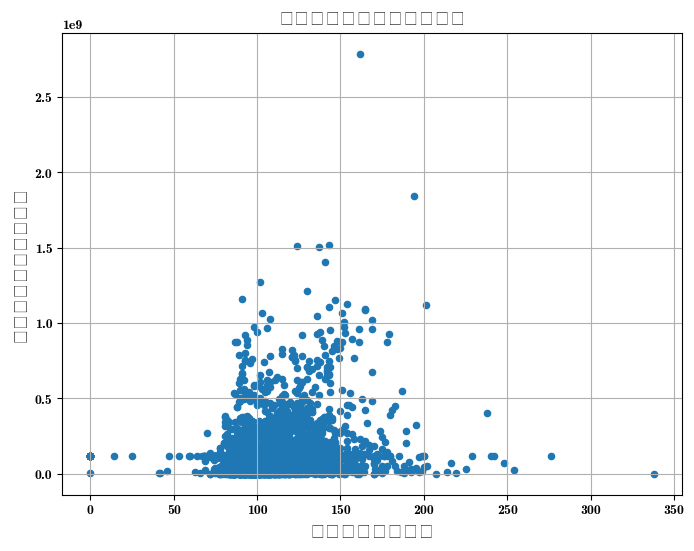

In [35]:
#电影时长与电影票房的关系：
data5.plot(kind='scatter', x='电影时长', y='收入（美元）', figsize=(8,6))
plt.title('电影时长与电影票房的关系',fontsize = 15)
plt.xlabel('电影时长（分钟）',fontsize=15)
plt.ylabel('电影票房收入（美元）',fontsize=15)
plt.grid(True)
# plt.savefig('./img/电影时长与电影票房的关系图.png', dpi=600, format='png', bbox_inches='tight')
plt.show()


/Users/mac/anaconda3/envs/pytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30005 (\N{CJK UNIFIED IDEOGRAPH-7535}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mac/anaconda3/envs/pytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24433 (\N{CJK UNIFIED IDEOGRAPH-5F71}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mac/anaconda3/envs/pytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mac/anaconda3/envs/pytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mac/anaconda3/envs/pytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 357

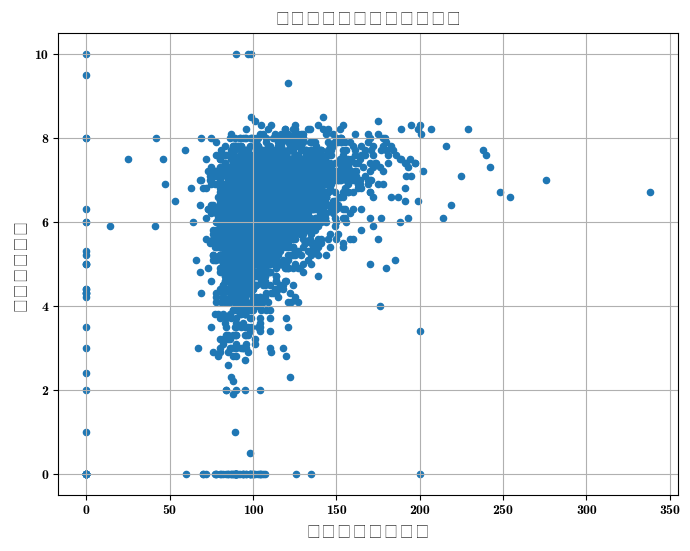

/Users/mac/anaconda3/envs/pytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30005 (\N{CJK UNIFIED IDEOGRAPH-7535}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mac/anaconda3/envs/pytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24433 (\N{CJK UNIFIED IDEOGRAPH-5F71}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mac/anaconda3/envs/pytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mac/anaconda3/envs/pytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mac/anaconda3/envs/pytorch/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 357

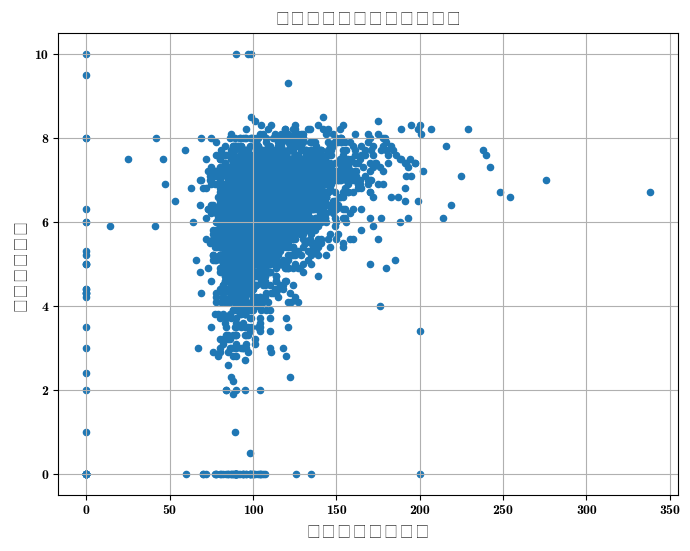

In [36]:
#电影时长与电影平均评分的关系：
data5.plot(kind='scatter', x='电影时长', y='平均评分', figsize=(8,6))
plt.title('电影时长与电影票房的关系',fontsize = 15)
plt.xlabel('电影时长（分钟）',fontsize=15)
plt.ylabel('电影平均评分',fontsize=15)
plt.grid(True)
# plt.savefig('./img/电影时长与电影票房的关系图.png', dpi=600, format='png', bbox_inches='tight')
plt.show()
#电影时长与电影平均评分的关系：
data5.plot(kind='scatter', x='电影时长', y='平均评分', figsize=(8,6))
plt.title('电影时长与电影票房的关系',fontsize = 15)
plt.xlabel('电影时长（分钟）',fontsize=15)
plt.ylabel('电影平均评分',fontsize=15)
plt.grid(True)
# plt.savefig('./img/电影时长与电影票房的关系图.png', dpi=600, format='png', bbox_inches='tight')
plt.show()


In [37]:
keywords_list = []
for i in data5['关键字']:
    keywords_list.append(i)
keywords = ''.join(keywords_list)


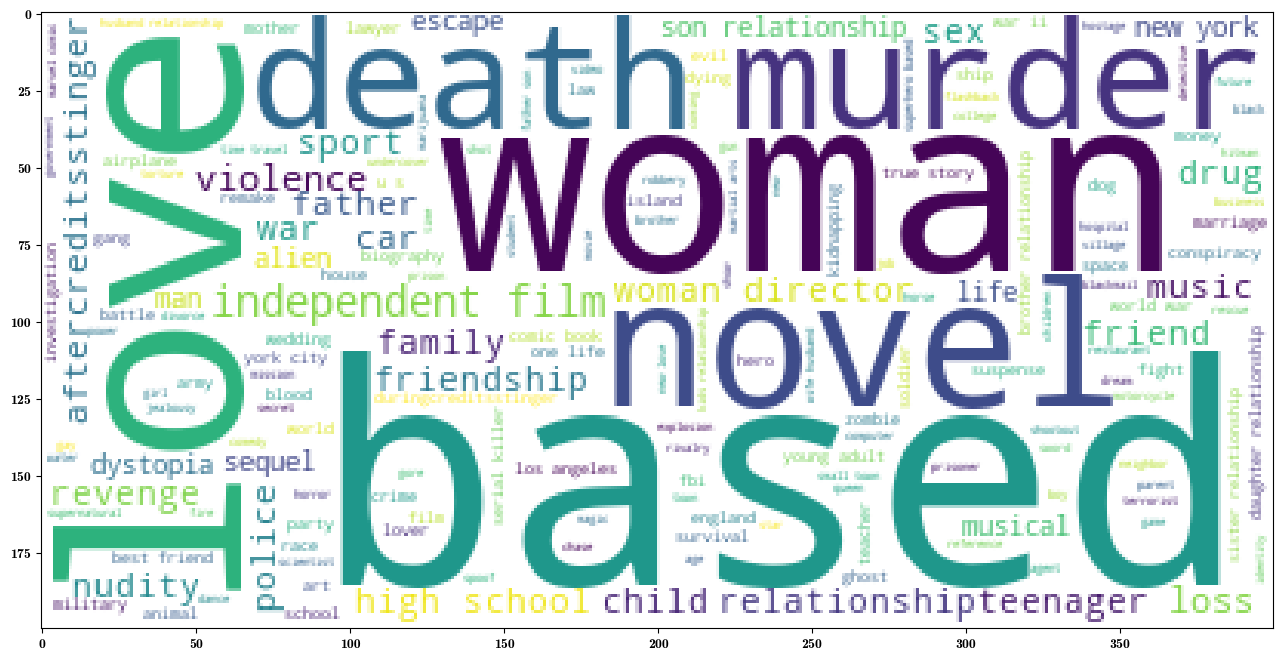

In [38]:
mv_wc = WordCloud(background_color='white',
              max_words=2000,
              max_font_size=100,
              random_state=12)

# 根据字符串生成词云
mv_wc.generate(keywords)

plt.figure(figsize=(16,8))
# 显示图片
plt.imshow(mv_wc)

# plt.savefig('./img/词云图.png', dpi=600, format='png', bbox_inches='tight')
plt.show()
